In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import datetime as dt 
import warnings
warnings.filterwarnings("ignore")

In [3]:
df2016=pd.read_csv("ridership/date-hour-soo-dest-2016.csv")
df2017=pd.read_csv("ridership/date-hour-soo-dest-2017.csv")

In [4]:
df2016.head(3)

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2016-01-01,0,12TH,12TH,1
1,2016-01-01,0,12TH,16TH,1
2,2016-01-01,0,12TH,24TH,4


In [5]:
df2017.head(3)

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2017-01-01,0,12TH,19TH,1
1,2017-01-01,0,12TH,24TH,2
2,2017-01-01,0,12TH,BAYF,1


In [6]:
df=df2017.merge(df2016,how='outer') # bu iki yılın verisini kullanacağız.

In [7]:
df.sample(5)

,Date,Hour,Origin Station,Destination Station,Trip Count
15419765,2016-07-18,7,RICH,ORIN,1
9524389,2017-12-14,15,SANL,WDUB,2
18740896,2016-11-16,13,RICH,PLZA,3
10221789,2016-01-10,18,MONT,CIVC,1
18850333,2016-11-20,15,GLEN,BALB,9


In [8]:
df.isnull().sum()

Date                   0
Hour                   0
Origin Station         0
Destination Station    0
Trip Count             0
dtype: int64

In [9]:
df['Date']=pd.to_datetime(df['Date'])

df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Weekday']=df['Date'].dt.dayofweek
df['Month_Name']=df['Date'].dt.month_name()
df['Weekday_Name']=df['Date'].dt.day_name()

df=df.drop('Date',axis=1) 

In [10]:
df.sample(5)

,Hour,Origin Station,Destination Station,Trip Count,Year,Month,Weekday,Month_Name,Weekday_Name
15210665,13,SBRN,CIVC,9,2016,7,6,July,Sunday
16172393,18,ROCK,FTVL,3,2016,8,6,August,Sunday
8364420,11,GLEN,WOAK,1,2017,11,3,November,Thursday
6703039,22,COLS,CIVC,2,2017,9,6,September,Sunday
13420309,22,ORIN,NCON,1,2016,5,3,May,Thursday


In [11]:
df['Trip Count'].sort_values()

0             1
9132259       1
9132257       1
9132255       1
9132248       1
           ... 
533485     1331
245007     1463
525019     1539
533651     1808
532937     1826
Name: Trip Count, Length: 19945677, dtype: int64

In [12]:
df['Trip Count'].describe() #max:1826 min:1 ortalama:12 yolculuk

count    1.994568e+07
mean     1.258672e+01
std      3.304556e+01
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      1.000000e+01
max      1.826000e+03
Name: Trip Count, dtype: float64

In [41]:
# Artık aya, güne ve saate göre verileri inceleyebiliriz.

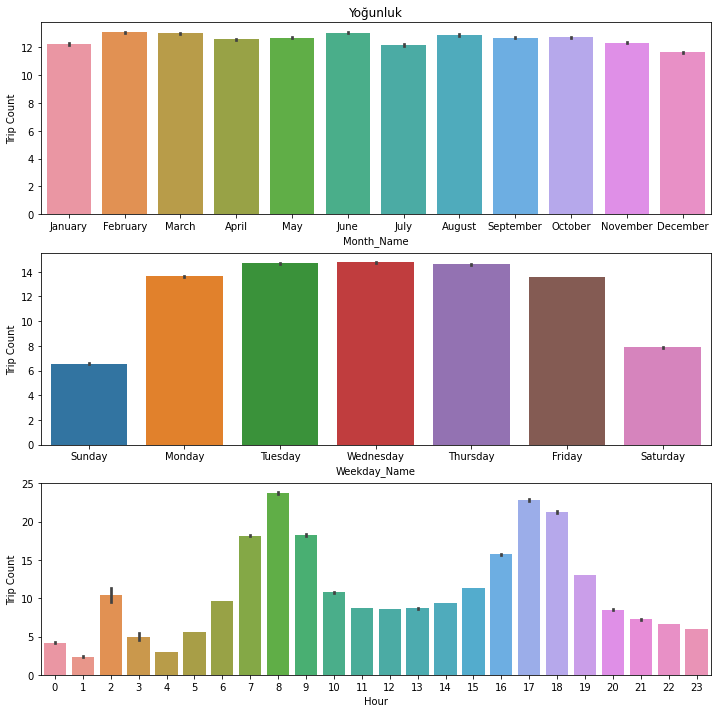

In [65]:
fig=plt.figure(figsize=(12,12))

ax=fig.add_subplot(311)
ax=sns.barplot(x=df['Month_Name'],y=df['Trip Count'])
ax.set_title("Yoğunluk")

bx=fig.add_subplot(312)
bx=sns.barplot(x=df['Weekday_Name'],y=df['Trip Count'])

cx=fig.add_subplot(313)
cx=sns.barplot(x=df['Hour'],y=df['Trip Count'])

In [14]:
# En yoğun ay Şubat
# En yoğun gün Çarşamba 
# En yoğun saatler sabah 8 akşam 17'dir. (iş gidiş-dönüş saatleri)

In [15]:
# Gece geç saatlerde kaç kişi istasyonda?-> 3,4'deki yolculuk sayısılarına bakılabilir.
hour_trip=df.groupby(['Hour'])['Trip Count'].sum()
hour_trip #gece 3'te 10.195 trip varmış. (Hatalı gibi, 4'te daha az kişi olmalıydı anlayamadım.)

Hour
0      2218003
1       394746
2        29517
3        10195
4       374944
5      2747284
6      7574290
7     17621693
8     26245142
9     20406841
10    11401688
11     9030065
12     8950559
13     9140087
14    10009593
15    12607053
16    18547607
17    27813272
18    25812109
19    14650901
20     8439157
21     6774216
22     5831246
23     4420376
Name: Trip Count, dtype: int64

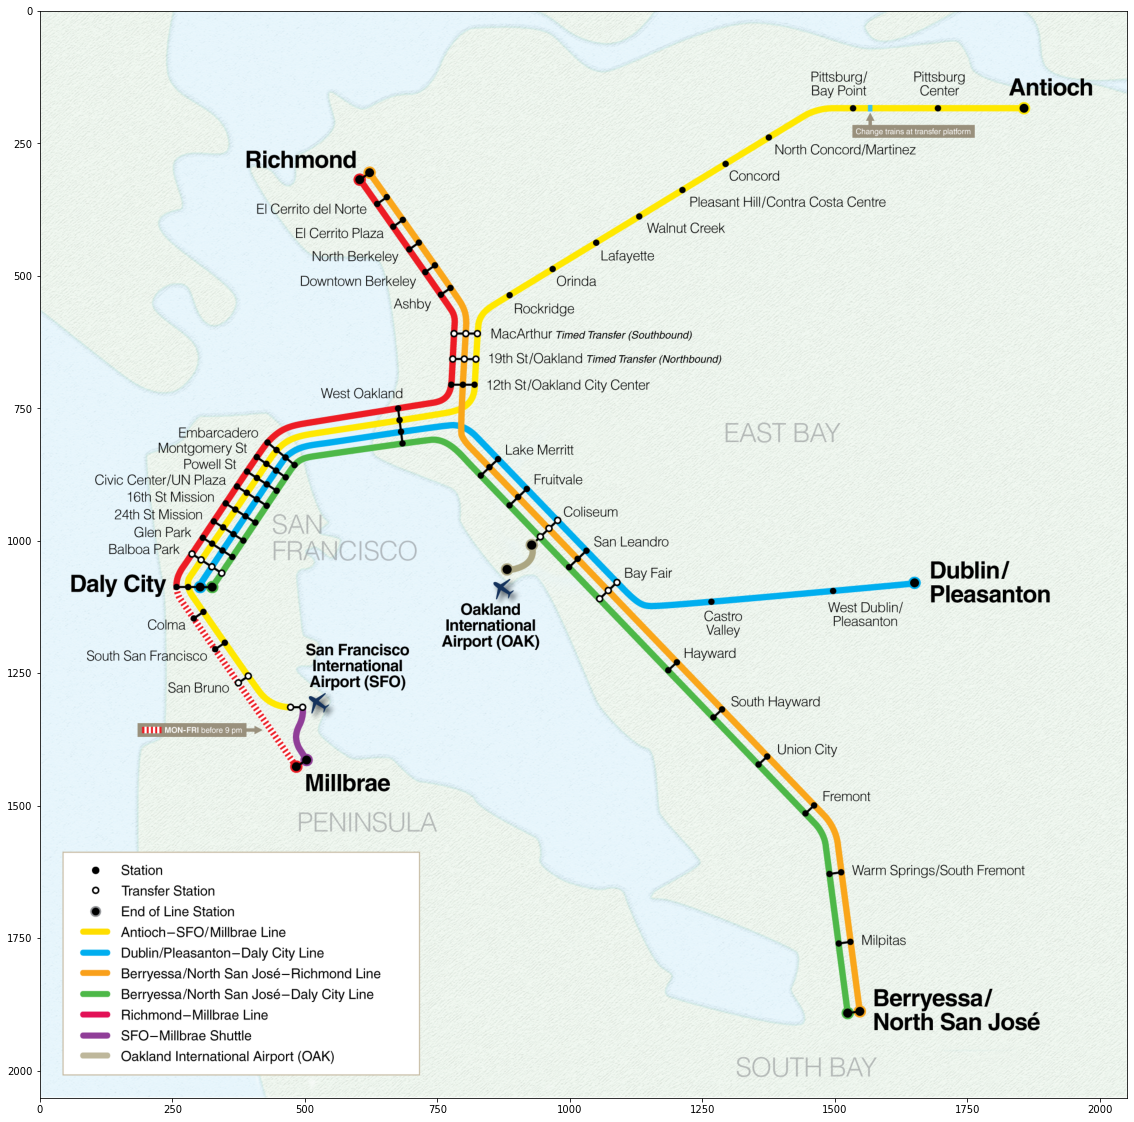

In [16]:
from IPython.display import Image
Image('resim.png')

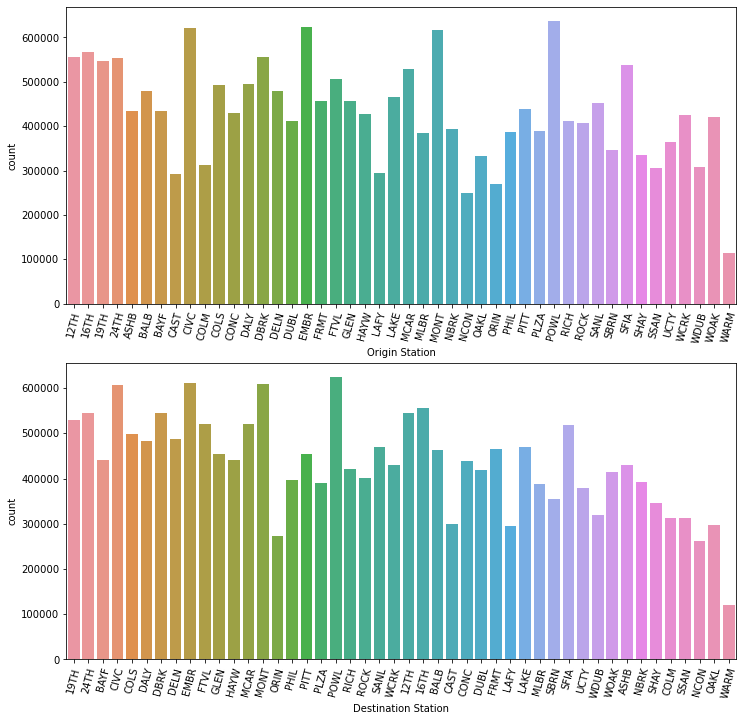

In [17]:
fig=plt.figure(figsize=(12,12))

ax=fig.add_subplot(211)
ax=sns.countplot(df['Origin Station'])
plt.xticks(rotation=75);

bx=fig.add_subplot(212)
bx=sns.countplot(df['Destination Station'])
plt.xticks(rotation=75);

# En yoğun BART istasyonu -> POWL
# En az yoğunlar -> Gidişte de dönüşte de az trip olanlar NCON,ORIN,LAFY -> Sarı Rotadakiler en az yoğundur.

In [18]:
station_names=pd.read_excel("Station_Names.xls")
station_names.sample(2)

,Unnamed: 0,Two-Letter Station Code,Station Name
18,NaN,CN,Concord
27,NaN,PL,Powell Street


In [19]:
station_names=station_names.drop('Unnamed: 0',axis=1)
#Station names uyumlu olmadığından verileri birleştiremedim.

In [20]:
# Berkeley'den SF'ye gitmek için en iyi zaman? -> KIRMIZI ROTANIN EN SAKİN OLDUĞU ZAMAN DİLİMİ?
# NBRK,DBRK -> WOAK 'a giden triplere bakacağız. 

In [ ]:
#x=pd.DataFrame(df['Origin Station']=='NBRK'|'DBRK')
#y=pd.DataFrame(df['Destination Station']=='WOAK'|'EMBR'|'MONT'|'POWL'|'CIVC'|'16TH'|'24TH'|'GLEN'|'BALB'|'COLM'|'SSAN'|'SBRN')
#z=pd.merge(x,y,left_on='Origin Station',right_index=True)

In [189]:
nbr=df.loc[df['Origin Station'] == 'NBRK'] 

In [192]:
# Hepsini seçemedim.
#nbr=(nbr['Destination Station']==['WOAK','EMBR','MONT','POWL','CIVC','16TH','24TH','GLEN','BALB','COLM','SSAN','SBRN'])

In [190]:
#Powl istasyonu genelde kalabalık olduğundan nbrk'dan powl'a gitmek için uygun zamanı bulalım. 
nbr = nbr[(nbr['Destination Station'] == 'POWL')] 

In [191]:
nbr

,Hour,Origin Station,Destination Station,Trip Count,Year,Month,Weekday,Month_Name,Weekday_Name
1203,1,NBRK,POWL,3,2017,1,6,January,Sunday
2435,3,NBRK,POWL,1,2017,1,6,January,Sunday
3151,8,NBRK,POWL,2,2017,1,6,January,Sunday
4066,9,NBRK,POWL,5,2017,1,6,January,Sunday
5157,10,NBRK,POWL,19,2017,1,6,January,Sunday
...,...,...,...,...,...,...,...,...,...
19940660,19,NBRK,POWL,28,2016,12,5,December,Saturday
19941996,20,NBRK,POWL,15,2016,12,5,December,Saturday
19943213,21,NBRK,POWL,42,2016,12,5,December,Saturday
19944371,22,NBRK,POWL,24,2016,12,5,December,Saturday


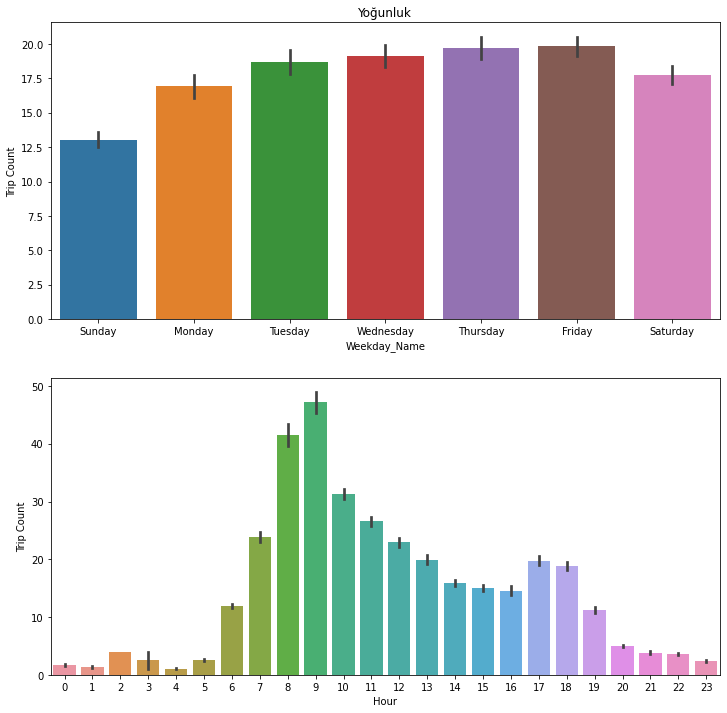

In [194]:
fig=plt.figure(figsize=(12,12))

bx=fig.add_subplot(211)
bx=sns.barplot(x=nbr['Weekday_Name'],y=nbr['Trip Count'])
bx.set_title("Yoğunluk")

cx=fig.add_subplot(212)
cx=sns.barplot(x=nbr['Hour'],y=nbr['Trip Count'])

#NBRK-POWL İSTASYONLARI ARASI YOĞUNLUĞUN EN AZ OLDUĞU SAATLER: 20.00-05.00 arası
#Koltuk bulamayacağımız saatler: 8.00-9.00

In [198]:
nbr['Trip Count'].describe() 
#örneğin nbrk'dan powl'a 215 yolculuk olduğu(max) bir saat dilimi varmış.(sabah 9.00)
#ort trip count ise 17.9

count    13419.000000
mean        17.960653
std         16.911387
min          1.000000
25%          5.000000
50%         13.000000
75%         24.000000
max        215.000000
Name: Trip Count, dtype: float64

In [ ]:
#Soru A: Her istasyon arasındaki düz hat mesafesini hesaplayın. -> ?
#Soru B: Herhangi bir 2 istasyon arasında bart ile işe gidip gelen insan sayısını tahmin edebilen bir model oluşturun.

In [285]:
x=nbr[['Month','Weekday','Hour']] #Bu etkenlere göre trip count tahmini yapacağız.
y=nbr[['Trip Count']]

#### Linear Regression

In [272]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=13)

In [273]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((10735, 3), (2684, 3), (10735, 1), (2684, 1))

In [274]:
lr=LinearRegression()
regmodel=lr.fit(x_train,y_train)

In [275]:
y_pretest=regmodel.predict(x_test) 
y_pretest

array([[25.28942482],
       [17.33742355],
       [15.29887172],
       ...,
       [15.38206309],
       [13.96275947],
       [17.35763767]])

In [276]:
from sklearn.metrics import mean_squared_error, r2_score 
(mean_squared_error(y_test,y_pretest))**0.5 , r2_score(y_test,y_pretest) 

(15.857175886341977, 0.12294381513522401)

#### Deep Learning 

In [286]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=13)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam

In [287]:
#Creating a Neural Network Model
model=Sequential()
model.add(Dense(81,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(27,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [288]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=128,epochs=800,verbose=1)

Epoch 1/800
84/84 [==============================] - 1s 2ms/step - loss: 567.6316 - val_loss: 353.3160
Epoch 2/800
84/84 [==============================] - 0s 1ms/step - loss: 361.8366 - val_loss: 321.5292
Epoch 3/800
84/84 [==============================] - 0s 1ms/step - loss: 316.7684 - val_loss: 281.9624
Epoch 4/800
84/84 [==============================] - 0s 1ms/step - loss: 281.2198 - val_loss: 242.2012
Epoch 5/800
84/84 [==============================] - 0s 1ms/step - loss: 229.1268 - val_loss: 198.5735
Epoch 6/800
84/84 [==============================] - 0s 1ms/step - loss: 179.3509 - val_loss: 160.4178
Epoch 7/800
84/84 [==============================] - 0s 1ms/step - loss: 159.2184 - val_loss: 144.4968
Epoch 8/800
84/84 [==============================] - 0s 1ms/step - loss: 153.2030 - val_loss: 136.7988
Epoch 9/800
84/84 [==============================] - 0s 1ms/step - loss: 136.5141 - val_loss: 118.6554
Epoch 10/800
84/84 [==============================] - 0s 1ms/step - loss:

84/84 [==============================] - 0s 1ms/step - loss: 69.9486 - val_loss: 76.9880
Epoch 82/800
84/84 [==============================] - 0s 1ms/step - loss: 66.2112 - val_loss: 71.6964
Epoch 83/800
84/84 [==============================] - 0s 1ms/step - loss: 61.8987 - val_loss: 74.0589
Epoch 84/800
84/84 [==============================] - 0s 1ms/step - loss: 65.7223 - val_loss: 70.1768
Epoch 85/800
84/84 [==============================] - 0s 1ms/step - loss: 70.0642 - val_loss: 74.2380
Epoch 86/800
84/84 [==============================] - 0s 1ms/step - loss: 66.2867 - val_loss: 71.8217
Epoch 87/800
84/84 [==============================] - 0s 1ms/step - loss: 60.6154 - val_loss: 79.1830
Epoch 88/800
84/84 [==============================] - 0s 1ms/step - loss: 66.7488 - val_loss: 70.0659
Epoch 89/800
84/84 [==============================] - 0s 1ms/step - loss: 64.1301 - val_loss: 71.7921
Epoch 90/800
84/84 [==============================] - 0s 1ms/step - loss: 62.8765 - val_loss: 6

Epoch 161/800
84/84 [==============================] - 0s 1ms/step - loss: 59.4193 - val_loss: 65.0534
Epoch 162/800
84/84 [==============================] - 0s 1ms/step - loss: 61.0515 - val_loss: 66.5633
Epoch 163/800
84/84 [==============================] - 0s 1ms/step - loss: 62.1132 - val_loss: 66.6303
Epoch 164/800
84/84 [==============================] - 0s 1ms/step - loss: 58.8572 - val_loss: 65.1281
Epoch 165/800
84/84 [==============================] - 0s 1ms/step - loss: 58.0717 - val_loss: 66.5528
Epoch 166/800
84/84 [==============================] - 0s 1ms/step - loss: 64.7321 - val_loss: 65.5781
Epoch 167/800
84/84 [==============================] - 0s 1ms/step - loss: 58.5353 - val_loss: 64.7529
Epoch 168/800
84/84 [==============================] - 0s 1ms/step - loss: 65.2493 - val_loss: 65.0834
Epoch 169/800
84/84 [==============================] - 0s 1ms/step - loss: 71.1922 - val_loss: 66.6327
Epoch 170/800
84/84 [==============================] - 0s 1ms/step - loss

84/84 [==============================] - 0s 1ms/step - loss: 60.8220 - val_loss: 67.7518
Epoch 241/800
84/84 [==============================] - 0s 1ms/step - loss: 70.3864 - val_loss: 64.6426
Epoch 242/800
84/84 [==============================] - 0s 1ms/step - loss: 62.4460 - val_loss: 64.2221
Epoch 243/800
84/84 [==============================] - 0s 1ms/step - loss: 57.1956 - val_loss: 66.3465
Epoch 244/800
84/84 [==============================] - 0s 1ms/step - loss: 55.9919 - val_loss: 68.1357
Epoch 245/800
84/84 [==============================] - 0s 1ms/step - loss: 58.0858 - val_loss: 64.6900
Epoch 246/800
84/84 [==============================] - 0s 1ms/step - loss: 58.3467 - val_loss: 68.1561
Epoch 247/800
84/84 [==============================] - 0s 1ms/step - loss: 54.7834 - val_loss: 66.1408
Epoch 248/800
84/84 [==============================] - 0s 1ms/step - loss: 61.7414 - val_loss: 67.8949
Epoch 249/800
84/84 [==============================] - 0s 1ms/step - loss: 65.7390 - va

84/84 [==============================] - 0s 1ms/step - loss: 58.1174 - val_loss: 67.0216
Epoch 320/800
84/84 [==============================] - 0s 1ms/step - loss: 54.4515 - val_loss: 65.9800
Epoch 321/800
84/84 [==============================] - 0s 1ms/step - loss: 71.5980 - val_loss: 64.9505
Epoch 322/800
84/84 [==============================] - 0s 1ms/step - loss: 58.3674 - val_loss: 65.1892
Epoch 323/800
84/84 [==============================] - 0s 1ms/step - loss: 59.4485 - val_loss: 66.3961
Epoch 324/800
84/84 [==============================] - 0s 1ms/step - loss: 55.9066 - val_loss: 68.4905
Epoch 325/800
84/84 [==============================] - 0s 1ms/step - loss: 61.9122 - val_loss: 66.8253
Epoch 326/800
84/84 [==============================] - 0s 1ms/step - loss: 56.5946 - val_loss: 64.9111
Epoch 327/800
84/84 [==============================] - 0s 1ms/step - loss: 55.0871 - val_loss: 64.8302
Epoch 328/800
84/84 [==============================] - 0s 1ms/step - loss: 59.0510 - va

84/84 [==============================] - 0s 1ms/step - loss: 65.4335 - val_loss: 65.2335
Epoch 399/800
84/84 [==============================] - 0s 1ms/step - loss: 57.0570 - val_loss: 63.9372
Epoch 400/800
84/84 [==============================] - 0s 1ms/step - loss: 56.1573 - val_loss: 64.2725
Epoch 401/800
84/84 [==============================] - 0s 1ms/step - loss: 61.1875 - val_loss: 64.7149
Epoch 402/800
84/84 [==============================] - 0s 1ms/step - loss: 63.2132 - val_loss: 65.1044
Epoch 403/800
84/84 [==============================] - 0s 1ms/step - loss: 61.3636 - val_loss: 64.7472
Epoch 404/800
84/84 [==============================] - 0s 1ms/step - loss: 67.1941 - val_loss: 66.9524
Epoch 405/800
84/84 [==============================] - 0s 1ms/step - loss: 59.1920 - val_loss: 64.3681
Epoch 406/800
84/84 [==============================] - 0s 1ms/step - loss: 56.1037 - val_loss: 66.0077
Epoch 407/800
84/84 [==============================] - 0s 1ms/step - loss: 55.3497 - va

84/84 [==============================] - 0s 1ms/step - loss: 55.4081 - val_loss: 66.2757
Epoch 478/800
84/84 [==============================] - 0s 1ms/step - loss: 54.4321 - val_loss: 66.3315
Epoch 479/800
84/84 [==============================] - 0s 1ms/step - loss: 54.7613 - val_loss: 64.9431
Epoch 480/800
84/84 [==============================] - 0s 1ms/step - loss: 62.6175 - val_loss: 67.5437
Epoch 481/800
84/84 [==============================] - 0s 1ms/step - loss: 57.7635 - val_loss: 66.1523
Epoch 482/800
84/84 [==============================] - 0s 1ms/step - loss: 66.3547 - val_loss: 63.4447
Epoch 483/800
84/84 [==============================] - 0s 1ms/step - loss: 54.4110 - val_loss: 66.1774
Epoch 484/800
84/84 [==============================] - 0s 1ms/step - loss: 57.8812 - val_loss: 63.9417
Epoch 485/800
84/84 [==============================] - 0s 1ms/step - loss: 58.6170 - val_loss: 64.2169
Epoch 486/800
84/84 [==============================] - 0s 1ms/step - loss: 52.8835 - va

84/84 [==============================] - 0s 1ms/step - loss: 59.1618 - val_loss: 66.9336
Epoch 557/800
84/84 [==============================] - 0s 1ms/step - loss: 69.1377 - val_loss: 65.1857
Epoch 558/800
84/84 [==============================] - 0s 1ms/step - loss: 57.3178 - val_loss: 66.8847
Epoch 559/800
84/84 [==============================] - 0s 1ms/step - loss: 58.5255 - val_loss: 65.2823
Epoch 560/800
84/84 [==============================] - 0s 1ms/step - loss: 58.5870 - val_loss: 66.0309
Epoch 561/800
84/84 [==============================] - 0s 1ms/step - loss: 60.3987 - val_loss: 64.2588
Epoch 562/800
84/84 [==============================] - 0s 1ms/step - loss: 55.0803 - val_loss: 64.3244
Epoch 563/800
84/84 [==============================] - 0s 1ms/step - loss: 63.0230 - val_loss: 66.5681
Epoch 564/800
84/84 [==============================] - 0s 1ms/step - loss: 56.6535 - val_loss: 66.7705
Epoch 565/800
84/84 [==============================] - 0s 1ms/step - loss: 55.5227 - va

84/84 [==============================] - 0s 1ms/step - loss: 53.6596 - val_loss: 68.3701
Epoch 636/800
84/84 [==============================] - 0s 1ms/step - loss: 58.9976 - val_loss: 65.2562
Epoch 637/800
84/84 [==============================] - 0s 1ms/step - loss: 61.0044 - val_loss: 64.3133
Epoch 638/800
84/84 [==============================] - 0s 1ms/step - loss: 55.9016 - val_loss: 67.0399
Epoch 639/800
84/84 [==============================] - 0s 1ms/step - loss: 63.1148 - val_loss: 64.5030
Epoch 640/800
84/84 [==============================] - 0s 1ms/step - loss: 62.7782 - val_loss: 64.9204
Epoch 641/800
84/84 [==============================] - 0s 1ms/step - loss: 55.1869 - val_loss: 65.0169
Epoch 642/800
84/84 [==============================] - 0s 1ms/step - loss: 58.5275 - val_loss: 64.1706
Epoch 643/800
84/84 [==============================] - 0s 1ms/step - loss: 64.8196 - val_loss: 64.7881
Epoch 644/800
84/84 [==============================] - 0s 1ms/step - loss: 56.2062 - va

84/84 [==============================] - 0s 1ms/step - loss: 61.5953 - val_loss: 64.3764
Epoch 715/800
84/84 [==============================] - 0s 1ms/step - loss: 52.6598 - val_loss: 64.8356
Epoch 716/800
84/84 [==============================] - 0s 1ms/step - loss: 56.8375 - val_loss: 66.4009
Epoch 717/800
84/84 [==============================] - 0s 1ms/step - loss: 53.6315 - val_loss: 65.2427
Epoch 718/800
84/84 [==============================] - 0s 1ms/step - loss: 58.1949 - val_loss: 64.3230
Epoch 719/800
84/84 [==============================] - 0s 1ms/step - loss: 60.9766 - val_loss: 67.2387
Epoch 720/800
84/84 [==============================] - 0s 1ms/step - loss: 57.7989 - val_loss: 64.7217
Epoch 721/800
84/84 [==============================] - 0s 1ms/step - loss: 57.6019 - val_loss: 64.0644
Epoch 722/800
84/84 [==============================] - 0s 1ms/step - loss: 57.5881 - val_loss: 66.6469
Epoch 723/800
84/84 [==============================] - 0s 1ms/step - loss: 57.6332 - va

84/84 [==============================] - 0s 1ms/step - loss: 57.3926 - val_loss: 64.8253
Epoch 794/800
84/84 [==============================] - 0s 1ms/step - loss: 58.2324 - val_loss: 67.7494
Epoch 795/800
84/84 [==============================] - 0s 1ms/step - loss: 55.0458 - val_loss: 64.6885
Epoch 796/800
84/84 [==============================] - 0s 1ms/step - loss: 53.9264 - val_loss: 65.0960
Epoch 797/800
84/84 [==============================] - 0s 1ms/step - loss: 56.0204 - val_loss: 64.0186
Epoch 798/800
84/84 [==============================] - 0s 1ms/step - loss: 56.8223 - val_loss: 64.3634
Epoch 799/800
84/84 [==============================] - 0s 1ms/step - loss: 66.7597 - val_loss: 64.7666
Epoch 800/800
84/84 [==============================] - 0s 1ms/step - loss: 53.9323 - val_loss: 63.7974


<AxesSubplot:>

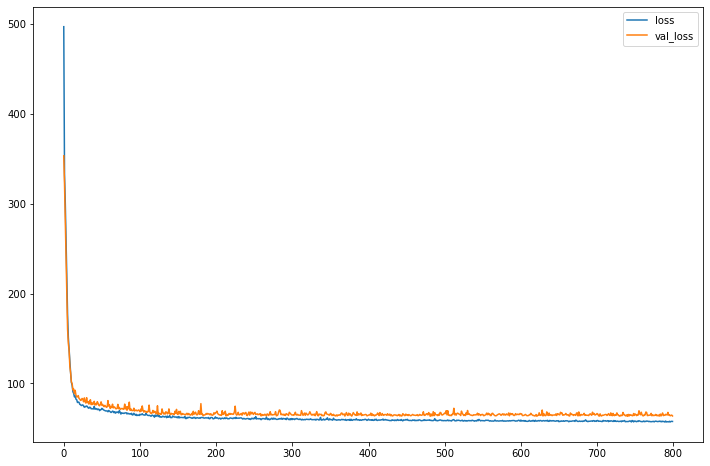

In [289]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [290]:
pred=model.predict(x_test)

In [291]:
(mean_squared_error(y_test,pred))**0.5 , r2_score(y_test,pred)

(7.9873262938943155, 0.7774751169572409)

#### Gradient Boosting

In [240]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=.01,max_depth=6, random_state=42)
gbcmodel=gbc.fit(x_train,y_train)

print("gbc score: " ,gbc.score(x_test,y_test)) 

gbc score:  0.10059612518628912


#### Decision Tree

In [242]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(x_train,y_train)
predict_d=d.predict(x)

accuracy_score(y,predict_d)

0.2604515984797675

#### Pycarot

In [277]:
from pycaret.regression import *

In [279]:
exp_name=setup(data=nbr,target='Trip Count')

,Description,Value
0,session_id,2229
1,Target,Trip Count
2,Original Data,"(13419, 9)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(9393, 24)"


In [280]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,4.7321,61.5640,7.7374,0.7925,0.4010,0.4725,0.0350
catboost,CatBoost Regressor,4.7896,63.3674,7.8523,0.7862,0.4116,0.4757,3.0690
xgboost,Extreme Gradient Boosting,4.9840,69.0823,8.2119,0.7664,0.4188,0.4848,0.5120
gbr,Gradient Boosting Regressor,5.2881,71.1086,8.3396,0.7594,0.4549,0.5881,0.0530
rf,Random Forest Regressor,5.4096,79.9020,8.8457,0.7293,0.4423,0.5056,0.1530
knn,K Neighbors Regressor,5.6686,79.9657,8.8722,0.7277,0.4696,0.5877,0.0190
et,Extra Trees Regressor,5.7364,90.0939,9.4078,0.6943,0.4737,0.5289,0.1810
dt,Decision Tree Regressor,5.7430,90.1983,9.4129,0.6940,0.4748,0.5289,0.0090
ada,AdaBoost Regressor,9.2814,177.1207,13.2948,0.3902,0.7281,1.3471,0.0180
br,Bayesian Ridge,11.2429,254.2112,15.9170,0.1276,0.9460,2.3777,0.0080
